# DXY Index / Bitcoin / S&P 500 Correlation

How the stock market performs in relation to bitcoin price and the strength of the US dollar.

In [2]:
import tradingeconomics as te
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [13]:
te.login()

'You are logged in as a jupyter:jupyter'

In [4]:
items = ['DXY:CUR', 'BTCUSD:CUR', 'SPX:IND']
data = te.fetchMarkets(symbol=items, initDate='2011-01-01', output_type='df')
data

,symbol,open,high,low,close
2022-08-13,BTCUSD:CUR,24230.000,24893.500,24065.190,24498.000
2022-08-12,BTCUSD:CUR,24211.000,24334.000,23601.000,24247.250
2022-08-12,DXY:CUR,105.157,105.882,105.087,105.631
2022-08-12,SPX:IND,4225.020,4280.470,4219.780,4280.150
2022-08-11,DXY:CUR,105.209,105.461,104.646,105.090
...,...,...,...,...,...
2011-04-25,DXY:CUR,74.074,74.268,73.813,73.986
2011-04-25,SPX:IND,1337.140,1337.550,1331.470,1335.250
2011-04-22,DXY:CUR,74.104,74.185,73.981,73.995
2011-04-21,DXY:CUR,74.402,74.407,73.735,73.995


In [5]:
# Transpose symbols into columns
df = pd.DataFrame()
for item in items:
    dx = data.loc[data['symbol'] == item][['close']]
    dx = dx.rename(columns={'close': item})
    dx.index.name = 'Date'
    if df.empty: df = dx
    else: df = pd.merge(df, dx, on='Date')      
df.sort_values(by='Date', inplace=True, ascending=True)
df.tail()

,DXY:CUR,BTCUSD:CUR,SPX:IND
Date,,,
2022-08-08,106.435,24068.84,4140.06
2022-08-09,106.374,23141.76,4122.47
2022-08-10,105.196,23902.09,4210.24
2022-08-11,105.090,24211.00,4207.27
2022-08-12,105.631,24247.25,4280.15


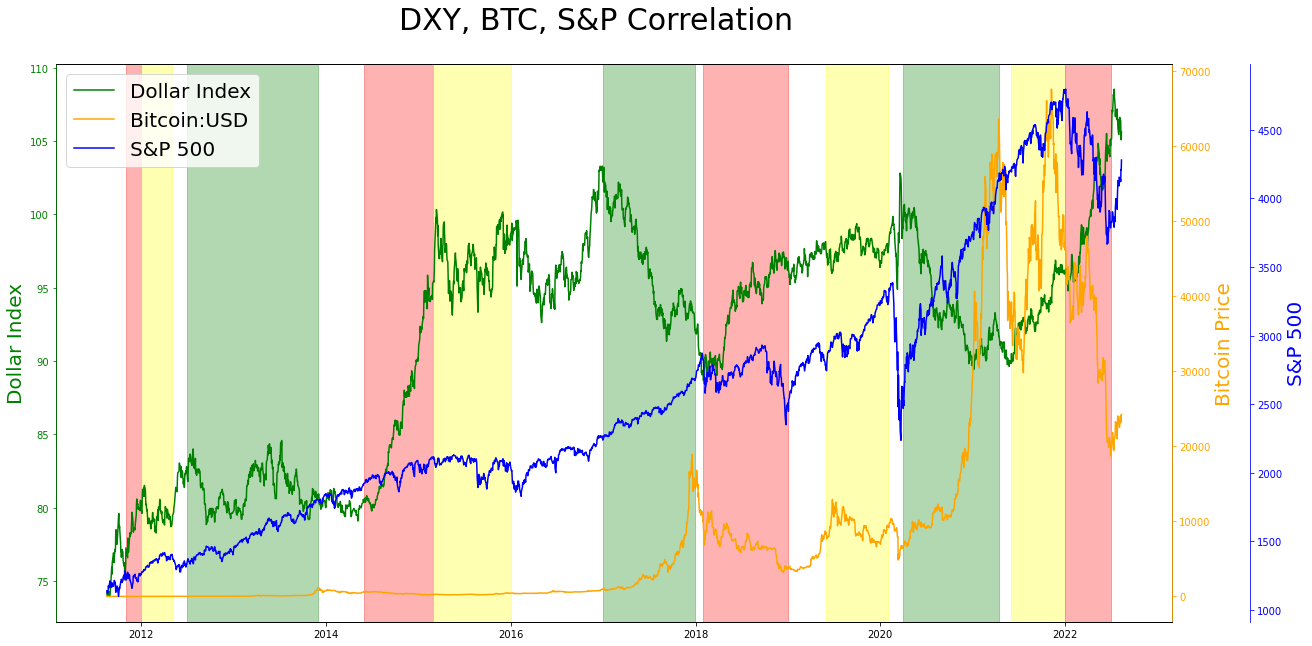

In [12]:
fig, ax1 = plt.subplots(figsize=(20, 10))

fig.subplots_adjust(top=0.9)
fig.suptitle("DXY, BTC, S&P Correlation", fontsize=30)

ax2 = ax1.twinx()
ax3 = ax1.twinx()

l1, =ax1.plot(df.index, df['DXY:CUR'], color='green', label='Dollar Index')
l2, =ax2.plot(df.index, df['BTCUSD:CUR'], color='orange', label='Bitcoin : USD')
l3, =ax3.plot(df.index, df['SPX:IND'], color='blue', label='S&P 500')
ax3.spines['right'].set_position(('axes', 1.07))

ax1.set_ylabel('Dollar Index', color='green', fontsize=20)
ax2.set_ylabel('Bitcoin Price', color='orange', fontsize=20)
ax3.set_ylabel('S&P 500', color='blue', fontsize=20)

ax1.tick_params(axis='y', colors='green')
ax2.tick_params(axis='y', colors='orange')
ax3.tick_params(axis='y', colors='blue')

ax2.spines['right'].set_color('orange')
ax3.spines['right'].set_color('blue')
ax3.spines['left'].set_color('green')

ax1.axvspan(*mdates.datestr2num(['2011-11-01', '2012-01-01']), color='red', alpha=0.3)
ax1.axvspan(*mdates.datestr2num(['2012-01-01', '2012-04-30']), color='yellow', alpha=0.3)
ax1.axvspan(*mdates.datestr2num(['2012-07-01', '2013-11-30']), color='green', alpha=0.3)
ax1.axvspan(*mdates.datestr2num(['2014-05-31', '2015-02-28']), color='red', alpha=0.3)
ax1.axvspan(*mdates.datestr2num(['2015-03-01', '2016-01-01']), color='yellow', alpha=0.3)
ax1.axvspan(*mdates.datestr2num(['2017-01-01', '2017-12-30']), color='green', alpha=0.3)
ax1.axvspan(*mdates.datestr2num(['2018-02-01', '2019-01-01']), color='red', alpha=0.3)
ax1.axvspan(*mdates.datestr2num(['2019-06-01', '2020-01-31']), color='yellow', alpha=0.3)
ax1.axvspan(*mdates.datestr2num(['2020-04-01', '2021-04-15']), color='green', alpha=0.3)
ax1.axvspan(*mdates.datestr2num(['2021-06-01', '2022-01-01']), color='yellow', alpha=0.3)
ax1.axvspan(*mdates.datestr2num(['2022-01-01', '2022-07-01']), color='red', alpha=0.3)

plt.legend([l1, l2, l3], ['Dollar Index', 'Bitcoin:USD', 'S&P 500'], fontsize=20)
plt.show()


# Legend

### Red sections
* Bitcoin bear cycle
* Dollar Index rises
* S&P 500 falls / sideways
____________________________

### Yellow sections
* Bitcoin accumulation
* Dollar Index sideways
* S&P 500 rises
_____________________________

### Green sections
* Bitcoin bull cycle
* Dollar Index falls/sideways
* S&P 500 rises